In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

Replace null value with null string

In [7]:
mail_df=df #.where((pd.notnull(df)),'')

In [8]:
mail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
mail_df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Label encoding

spam-> 1

ham-> 0

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mail_df['Encoded_Category'] = le.fit_transform(mail_df['Category'])


In [11]:
mail_df

,Category,Message,Encoded_Category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [12]:
mail_df.drop(columns='Category',axis=1,inplace=True)

In [13]:
mail_df

,Message,Encoded_Category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [14]:
X = mail_df['Message']
Y = mail_df['Encoded_Category']


In [15]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [16]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Encoded_Category, Length: 5572, dtype: int64

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Feature Extraction

In [18]:
feature_extraction=TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


Model Building

In [19]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [20]:
train_pred=model.predict(X_train_features)
train_accuracy=accuracy_score(Y_train,train_pred)
train_accuracy

0.9685887368184878

In [21]:
test_pred=model.predict(X_test_features)
test_accuracy=accuracy_score(Y_test,test_pred)
test_accuracy

0.9533632286995516

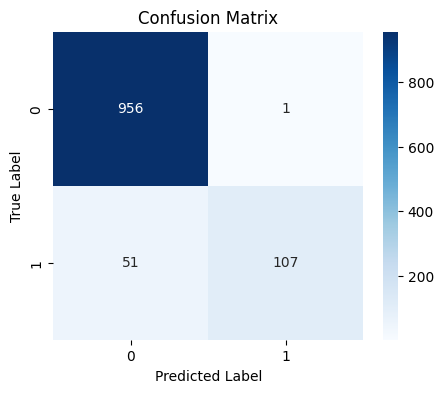

In [22]:
cm=confusion_matrix(Y_test,test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True, fmt= 'd',cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
print(classification_report(Y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       957
           1       0.99      0.68      0.80       158

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



In [24]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)

if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

Ham mail


In [25]:
import pickle

# Save the model
with open('spam_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('feature_extraction.pkl', 'wb') as vectorizer_file:
    pickle.dump(feature_extraction, vectorizer_file)
